In [1]:
# Import libraries
try:
    # Importing general libraries
    import os
    import glob
    import pandas as pd
    import joblib

    # Importing libraries for data visualization
    import matplotlib.pyplot as plt
    import numpy as np

    # Importing libraries for model building
    from sklearn.inspection import PartialDependenceDisplay
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, make_scorer

    # Importing libraries for data preprocessing
    from scipy.stats import randint

except Exception as e:
    print(f"Error : {e}")

In [2]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [3]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [4]:
categorical_cols_unified = ['partType', 'microstructure', 'seedLocation', 'castType']

In [5]:
# Creating a copy of the dataframe to ensure we maintain the original intact
onehot_encoded_df = df.copy()
encoder = "One-Hot Encoding"

# Initialize and fit the encoder
ohe = OneHotEncoder(sparse_output=False, drop=None)
# Reshape the data to handle multiple categorical columns
encoded_data = ohe.fit_transform(onehot_encoded_df[categorical_cols_unified].values)

# Convert to DataFrame with feature names
encoded_df = pd.DataFrame(
    encoded_data,
    columns=ohe.get_feature_names_out(categorical_cols_unified)
)

# Combine with non-categorical columns if needed
onehot_encoded_df = pd.concat([onehot_encoded_df.drop(columns=categorical_cols_unified), encoded_df], axis=1)

# Display the first few rows to verify
display(onehot_encoded_df.head())

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,1469.17,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1793.64,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,700.60,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1082.10,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1838.83,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
# Features (X) and target (y)
X = onehot_encoded_df.drop(columns=['Lifespan'])  # Features excluding the target variable
y = onehot_encoded_df['Lifespan']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression(n_jobs=-1)

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
msle = mean_squared_log_error(y_test, y_pred)  # Mean Squared Log Error

# Print evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")
print(f"MAE : {mae:.2f}")

RMSE: 301.66
R²  : 0.12
MAE : 254.76


--- Linear Regression Performance with Reduced Features ---

Reduced Features RMSE: 299.94
Reduced Features R² Score: 0.13
Reduced Features MAE: 253.84


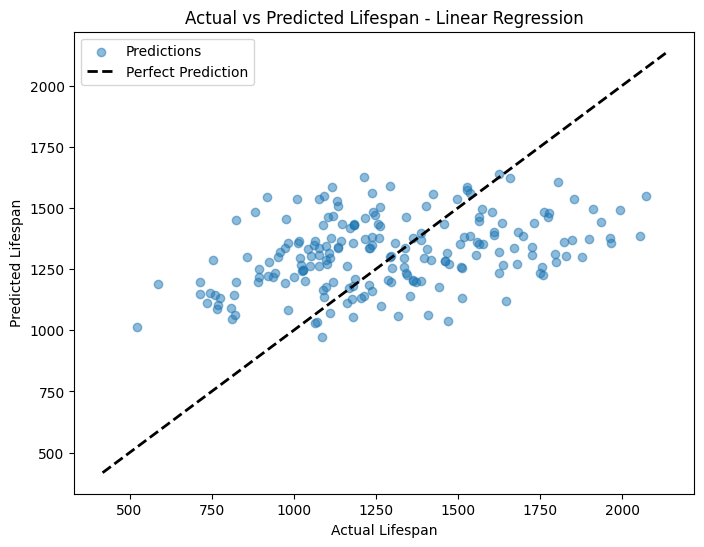

In [ ]:
# Selecting only the most important features (those with non-zero or significant importance)
important_features = ['partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve', 'coolingRate', 'Nickel%', 'HeatTreatTime', 'Chromium%' , 'quenchTime']
X_important = onehot_encoded_df[important_features]

# Split the dataset and retrain the model
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, df['Lifespan'], test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression(n_jobs=-1)
model_name='Linear Regression'

# Train the model on the training data with reduced features
lin_reg.fit(X_train_imp, y_train_imp)

# Make predictions on the test set
y_pred_imp = lin_reg.predict(X_test_imp)

# Evaluate the model's performance
rmse_imp = root_mean_squared_error(y_test_imp, y_pred_imp)  # Root Mean Squared Error
r2_imp = r2_score(y_test_imp, y_pred_imp)  # R² Score
mae_imp = mean_absolute_error(y_test_imp, y_pred_imp)  # Mean Absolute Error

# Print evaluation metrics for reduced features
print(f"--- {model_name} Performance with Reduced Features ---\n")
print(f"Reduced Features RMSE: {rmse_imp:.2f}")
print(f"Reduced Features R²  : {r2_imp:.2f}")
print(f"Reduced Features MAE : {mae_imp:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_imp, y_pred_imp, alpha=0.5, label='Predictions')
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title(f"Actual vs Predicted Lifespan - {model_name}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line for perfect predictions
plt.legend()
plt.show()